In [1]:
# First Party
import smdebug.pytorch as smd
from smdebug.pytorch import Hook, SaveConfig

[2022-09-19 04:25:58.732 gya-figaro:58519 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-09-19 04:25:58.845 gya-figaro:58519 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [2]:
trial = smd.create_trial(path="./tmp/testing/demo")

[2022-09-19 04:26:00.783 gya-figaro:58519 INFO local_trial.py:35] Loading trial demo at path ./tmp/testing/demo


In [7]:
trial.steps(mode=smd.modes.TRAIN)

[]


In [4]:
trial.steps(mode=smd.modes.EVAL)

[]

In [3]:
trial.tensor_names(collection="all")

[2022-09-19 04:26:04.383 gya-figaro:58519 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2022-09-19 04:26:05.388 gya-figaro:58519 INFO trial.py:210] Loaded all steps


['Net_conv1.bias',
 'Net_conv1.weight',
 'Net_conv2.bias',
 'Net_conv2.weight',
 'Net_fc1.bias',
 'Net_fc1.weight',
 'Net_fc2.bias',
 'Net_fc2.weight',
 'Net_input_0',
 'Net_output_0',
 'conv1_input_0',
 'conv1_output_0',
 'conv2_input_0',
 'conv2_output_0',
 'fc1_input_0',
 'fc1_output_0',
 'fc2_input_0',
 'fc2_output_0',
 'gradient/Net_conv1.bias',
 'gradient/Net_conv1.weight',
 'gradient/Net_conv2.bias',
 'gradient/Net_conv2.weight',
 'gradient/Net_fc1.bias',
 'gradient/Net_fc1.weight',
 'gradient/Net_fc2.bias',
 'gradient/Net_fc2.weight',
 'max_pool2_input_0',
 'max_pool2_output_0',
 'max_pool_input_0',
 'max_pool_output_0',
 'relu0_input_0',
 'relu0_output_0',
 'relu1_input_0',
 'relu1_output_0',
 'relu2_input_0',
 'relu2_output_0']

In [4]:
trial.tensor("gradient/Net_conv1.bias")

In [18]:
trial.tensor("conv1_input_0").value(20).shape

(64, 1, 28, 28)

In [22]:
trial.tensor("Net_conv1.weight").value(20).shape

(20, 1, 5, 5)

In [15]:
trial.tensor("conv1_output_0").value(20).shape

(64, 20, 24, 24)

In [30]:
trial.tensor("relu0_output_0").values()[20].shape

(64, 20, 24, 24)

In [7]:
trial.steps()

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 500]

In [8]:
trial.tensor("conv1_output_0").values()[20]

array([[[[ 0.23466714,  0.23466714,  0.23466714, ...,  0.23466714,
           0.23466714,  0.23466714],
         [ 0.23466714,  0.23466714,  0.23466714, ...,  0.23466714,
           0.23466714,  0.23466714],
         [ 0.23466714,  0.23466714,  0.3889555 , ...,  0.23466714,
           0.23466714,  0.23466714],
         ...,
         [ 0.23466714,  0.23466714,  0.23466714, ...,  0.23466714,
           0.23466714,  0.23466714],
         [ 0.23466714,  0.23466714,  0.23466714, ...,  0.23466714,
           0.23466714,  0.23466714],
         [ 0.23466714,  0.23466714,  0.23466714, ...,  0.23466714,
           0.23466714,  0.23466714]],

        [[-0.11309496, -0.11309496, -0.11309496, ..., -0.11309496,
          -0.11309496, -0.11309496],
         [-0.11309496, -0.11309496, -0.11309496, ..., -0.11309496,
          -0.11309496, -0.11309496],
         [-0.11309496, -0.11309496, -0.27209494, ..., -0.11309496,
          -0.11309496, -0.11309496],
         ...,
         [-0.11309496, -0.11309496

In [9]:
trial.tensor("conv1_input_0").values()[20].shape

(64, 1, 28, 28)

In [10]:
import torch
trial.tensor("Net_conv2.weight").reduction_value(20, "variance")

0.0006786293

In [11]:
trial.tensor("relu0_output_0").values()[20]

array([[[[0.23466714, 0.23466714, 0.23466714, ..., 0.23466714,
          0.23466714, 0.23466714],
         [0.23466714, 0.23466714, 0.23466714, ..., 0.23466714,
          0.23466714, 0.23466714],
         [0.23466714, 0.23466714, 0.3889555 , ..., 0.23466714,
          0.23466714, 0.23466714],
         ...,
         [0.23466714, 0.23466714, 0.23466714, ..., 0.23466714,
          0.23466714, 0.23466714],
         [0.23466714, 0.23466714, 0.23466714, ..., 0.23466714,
          0.23466714, 0.23466714],
         [0.23466714, 0.23466714, 0.23466714, ..., 0.23466714,
          0.23466714, 0.23466714]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def get_data(trial, tname, batch_index, steps_range):
    tensor = trial.tensor(tname)
    vals = []
    for s in steps_range:
        val = tensor.value(step_num=s)[batch_index][0]
        vals.append(val)
    return vals


def create_plots(steps_range):
    fig, axs = plt.subplots(
        nrows=1,
        ncols=len(steps_range),
        constrained_layout=True,
        figsize=(2 * len(steps_range), 2),
        subplot_kw={"xticks": [], "yticks": []},
    )
    return fig, axs


def plot_tensors(trial, layer, batch_index, steps_range):
    if len(steps_range) > 0:
        fig, axs = create_plots(steps_range)
        vals = get_data(trial, layer, batch_index, steps_range)

        for ax, image, step in zip(
            axs.flat if isinstance(axs, np.ndarray) else np.array([axs]), vals, steps_range
        ):
            ax.imshow(image, cmap="gray")
            ax.set_title(str(step))
        plt.show()

In [13]:
import time
import sys
from time import gmtime, strftime


def print_same_line(s):
    sys.stdout.write("\r{}: {}".format(strftime("%X", gmtime()), s))
    sys.stdout.flush()

[2022-09-03 03:04:21.969 gya-figaro:14793 INFO local_trial.py:35] Loading trial demo at path ./tmp/testing/demo
[2022-09-03 03:04:22.084 gya-figaro:14793 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2022-09-03 03:04:23.088 gya-figaro:14793 INFO trial.py:210] Loaded all steps
19:04:23: Waiting for tensors to become available...
Done
Getting tensors and plotting...


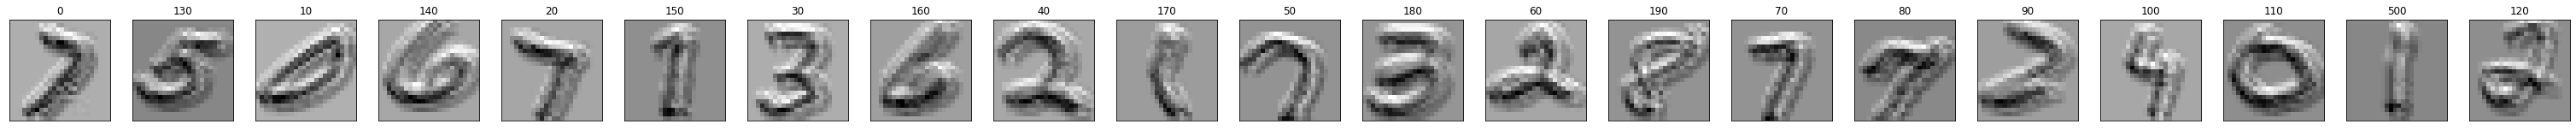


Done


In [14]:
trial = smd.create_trial(path="./tmp/testing/demo")

steps = 0
while steps == 0:
    # trial.steps return all steps that have been downloaded by Debugger to date.
    # It doesn't represent all steps that are to be available once training job is complete -
    # it is a snapshot of a current state of the training job. If you call it after training job is done
    # you will get all tensors available at once.
    steps = trial.steps()
    print_same_line("Waiting for tensors to become available...")
    time.sleep(3)
print("\nDone")

loaded_all_steps = False
layer = "conv1_output_0"
batch_index = 0
rendered_steps = []

print("Getting tensors and plotting...")

while not loaded_all_steps:
    loaded_all_steps = trial.loaded_all_steps
    steps = trial.steps()
    # quick way to get diff between two lists
    steps_to_render = list(set(steps).symmetric_difference(set(rendered_steps)))
    # plot only tensors from newer chunk
    plot_tensors(trial, layer, batch_index, steps_to_render)
    rendered_steps.extend(steps_to_render)
    time.sleep(5)

print("\nDone")